In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:/BigData/Buoi2/train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
df_number = df.select_dtypes(include=['number'])
df_filled = df_number.interpolate()
df_final = df_filled.drop(columns=['PassengerId'])
print(df_final.info())
print("\nBang thong ke mo ta cua cac cot: \n")
print(df_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB
None

Bang thong ke mo ta cua cac cot: 

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.726061    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.902353    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.910400
50%      0.000000    3.0

In [4]:
data_count = df_final.count()
print(data_count)

data_mean = df_final.mean()
print(data_mean)

data_median = df_final.median()
print(data_median)

data_var = df_final.var()
print(data_var)

data_std = df_final.std()
print(data_std)

data_min = df_final.min()
print(data_min)

data_quantile = df_final.apply(lambda x: x.quantile([0.25, 0.5, 0.75]))
print(data_quantile)

data_iqr = df_final.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print(data_iqr)

data_max = df_final.max()
print(data_max)

summary = {
    'count': data_count,
    'mean': data_mean,
    'median': data_median,
    'var': data_var,
    'std': data_std,
    'min': data_min,
    'q1': data_quantile.loc[0.25],
    'q2': data_quantile.loc[0.5],
    'q3': data_quantile.loc[0.75],
    'iqr': data_iqr,
    'max': data_max
}

df_sumary = pd.DataFrame(summary).T
print("\nBang tong hop cac chi so mo ta:\n")
print(df_sumary)


Survived    891
Pclass      891
Age         891
SibSp       891
Parch       891
Fare        891
dtype: int64
Survived     0.383838
Pclass       2.308642
Age         29.726061
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64
Survived     0.0000
Pclass       3.0000
Age         28.5000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64
Survived       0.236772
Pclass         0.699015
Age          193.275428
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64
Survived     0.486592
Pclass       0.836071
Age         13.902353
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64
Survived    0.00
Pclass      1.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64
      Survived  Pclass   Age  SibSp  Parch     Fare
0.25       0.0     2.0  21.0    0.0    0.0   7.9104
0.50       0.0     3.0  28.5    0.0    0.0  14.4542
0.75       1.0     3.0  38.0  

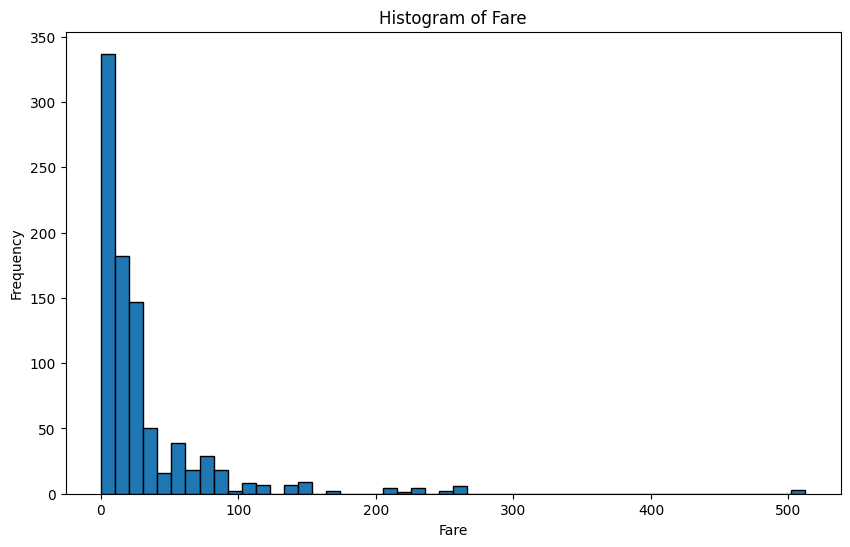

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df_final['Fare'], bins=50, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.grid(False)
plt.show()

<Figure size 1500x1000 with 0 Axes>

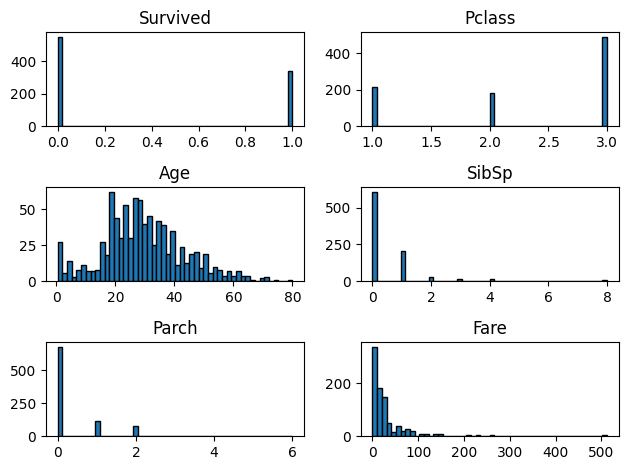

In [6]:
plt.figure(figsize=(15, 10))
df_final.hist(bins=50, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

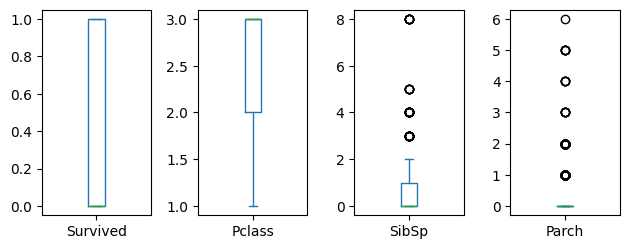

In [7]:
df_box = df_final.select_dtypes(include=['Int64'])
plt.figure(figsize=(15,10))
df_box.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.tight_layout()
plt.show()